In [3]:
from google.colab import drive
import os

# Mounting Drive
drive.mount('/content/drive')

# Data file path
data_dir = "/content/drive/My Drive/AAI540:ML_Final_Team_Project/Data"
os.listdir(data_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['f1023ez-approvals-2024.xlsx',
 'f1023ez-approvals-2023.xlsx',
 'f1023ez-approvals-2022.xlsx']

In [4]:
import pandas as pd

# Loop through all excel files
for file in os.listdir(data_dir):
    if file.endswith(".xlsx"):
        file_path = os.path.join(data_dir, file)

        # Reading files
        df = pd.read_excel(file_path)

        # Print the filename & column headers
        print(f"Columns in {file}:")
        print(df.columns)
        print("-" * 40)

Columns in f1023ez-approvals-2024.xlsx:
Index(['Ein', 'Case Number', 'Formrevision', 'Eligibilityworksheet',
       'Orgname1', 'Orgname2', 'Address', 'City', 'State', 'Zip',
       ...
       'Correctnessdeclaration', 'Mission', 'Gamingactyno.1',
       'Gamingactyyes.1', 'Hospitalorchurchno', 'Hospitalorchurchyes',
       'Ezversionnumber', 'Signaturename', 'Signaturetitle', 'Signaturedate'],
      dtype='object', length=110)
----------------------------------------
Columns in f1023ez-approvals-2023.xlsx:
Index(['Ein', 'Case Number', 'Formrevision', 'Eligibilityworksheet',
       'Orgname1', 'Orgname2', 'Address', 'City', 'State', 'Zip',
       ...
       'Correctnessdeclaration', 'Mission', 'Gamingactyno.1',
       'Gamingactyyes.1', 'Hospitalorchurchno', 'Hospitalorchurchyes',
       'Ezversionnumber', 'Signaturename', 'Signaturetitle', 'Signaturedate'],
      dtype='object', length=110)
----------------------------------------
Columns in f1023ez-approvals-2022.xlsx:
Index(['Ein', 

In [5]:
columns_set = set()

# Collect column sets from each file
for file in os.listdir(data_dir):
    if file.endswith(".xlsx"):
        file_path = os.path.join(data_dir, file)
        df = pd.read_excel(file_path)
        columns_set.add(tuple(df.columns))

# Printing any unique sets of columns
print(f"Unique column sets across files: {len(columns_set)}")
for cols in columns_set:
    print(cols)

Unique column sets across files: 1
('Ein', 'Case Number', 'Formrevision', 'Eligibilityworksheet', 'Orgname1', 'Orgname2', 'Address', 'City', 'State', 'Zip', 'Zippl4', 'Accountingperiodend', 'Primarycontactname', 'Primarycontactphone', 'Primarycontactphoneext', 'Primarycontactfax', 'Userfeesubmitted', 'Ofcrdirtrust1firstname', 'Ofcrdirtrust1lastname', 'Ofcrdirtrust1title', 'Ofcrdirtrust1streetaddr', 'Ofcrdirtrust1city', 'Ofcrdirtrust1state', 'Ofcrdirtrust1zip', 'Ofcrdirtrust1zippl4', 'Ofcrdirtrust2firstname', 'Ofcrdirtrust2lastname', 'Ofcrdirtrust2title', 'Ofcrdirtrust2streetaddr', 'Ofcrdirtrust2city', 'Ofcrdirtrust2state', 'Ofcrdirtrust2zip', 'Ofcrdirtrust2zippl4', 'Ofcrdirtrust3firstname', 'Ofcrdirtrust3lastname', 'Ofcrdirtrust3title', 'Ofcrdirtrust3streetaddr', 'Ofcrdirtrust3city', 'Ofcrdirtrust3state', 'Ofcrdirtrust3zip', 'Ofcrdirtrust3zippl4', 'Ofcrdirtrust4firstname', 'Ofcrdirtrust4lastname', 'Ofcrdirtrust4title', 'Ofcrdirtrust4streetaddr', 'Ofcrdirtrust4city', 'Ofcrdirtrust4state

In [6]:
# List to store dataframes
dataframes = []

# Loop through files and read them into list
for file in os.listdir(data_dir):
    if file.endswith(".xlsx"):
        file_path = os.path.join(data_dir, file)
        df = pd.read_excel(file_path)

        dataframes.append(df)

# Combine all dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

# Display combined df
print("Combined DataFrame Info:")
print(combined_df.info())
print(combined_df.head())

Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233389 entries, 0 to 233388
Columns: 110 entries, Ein to Signaturedate
dtypes: datetime64[ns](1), float64(1), int64(47), object(61)
memory usage: 195.9+ MB
None
          Ein        Case Number  Formrevision  Eligibilityworksheet  \
0  88-1131440  EO-2023039-000499         12018                     1   
1  16-1459535  EO-2023072-000620         12018                     1   
2  92-2799563  EO-2023081-000041         12018                     1   
3  92-2614399  EO-2023095-000070         12018                     1   
4  92-3400000  EO-2023123-000313         12018                     1   

                              Orgname1 Orgname2             Address  \
0                 AIRSOFT ALLIANCE INC               12 SHARONS WAY   
1  PRINCE HALL MASONS STARS OF ROCHEST   ER INC    616 BROWN STREET   
2                     PURE LOVE 22 INC                   PO BOX 715   
3      ISLAMIC INSTITUTE OF ALBANY INC         

In [7]:
# Save to a CSV file for future use
output_path = "/content/drive/My Drive/AAI540:ML_Final_Team_Project/Data/combined_data.csv"
combined_df.to_csv(output_path, index=False)
print(f"Combined dataset saved at: {output_path}")

Combined dataset saved at: /content/drive/My Drive/AAI540:ML_Final_Team_Project/Data/combined_data.csv


In [9]:
# Identify binary columns based on column names ending with 'yes' or 'no'
binary_columns = [col for col in combined_df.columns if col.lower().endswith('yes') or col.lower().endswith('no')]

# Identify non-binary columns
non_binary_columns = [col for col in combined_df.columns if col not in binary_columns]

print("Binary Columns:")
print(binary_columns)
print("\nNon-Binary Columns:")
print(non_binary_columns)

Binary Columns:
['Leginflno', 'Leginflyes', 'Compofcrdirtrustno', 'Compofcrdirtrustyes', 'Donatefundsno', 'Donatefundsyes', 'Conductactyoutsideusno', 'Conductactyoutsideusyes', 'Financialtransofcrsno', 'Financialtransofcrsyes', 'Unrelgrossincm1000moreno', 'Unrelgrossincm1000moreyes', 'Gamingactyno', 'Gamingactyyes', 'Disasterreliefno', 'Disasterreliefyes', 'Hospitalorchurchno', 'Hospitalorchurchyes']

Non-Binary Columns:
['Ein', 'Case Number', 'Formrevision', 'Eligibilityworksheet', 'Orgname1', 'Orgname2', 'Address', 'City', 'State', 'Zip', 'Zippl4', 'Accountingperiodend', 'Primarycontactname', 'Primarycontactphone', 'Primarycontactphoneext', 'Primarycontactfax', 'Userfeesubmitted', 'Ofcrdirtrust1firstname', 'Ofcrdirtrust1lastname', 'Ofcrdirtrust1title', 'Ofcrdirtrust1streetaddr', 'Ofcrdirtrust1city', 'Ofcrdirtrust1state', 'Ofcrdirtrust1zip', 'Ofcrdirtrust1zippl4', 'Ofcrdirtrust2firstname', 'Ofcrdirtrust2lastname', 'Ofcrdirtrust2title', 'Ofcrdirtrust2streetaddr', 'Ofcrdirtrust2city', '

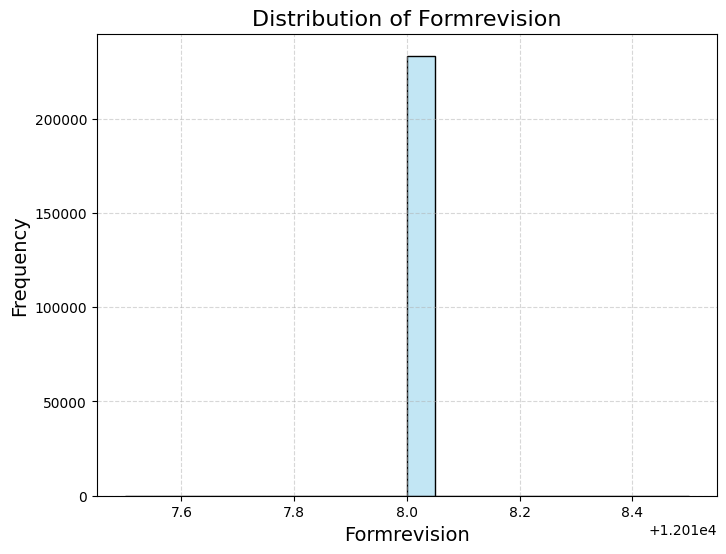

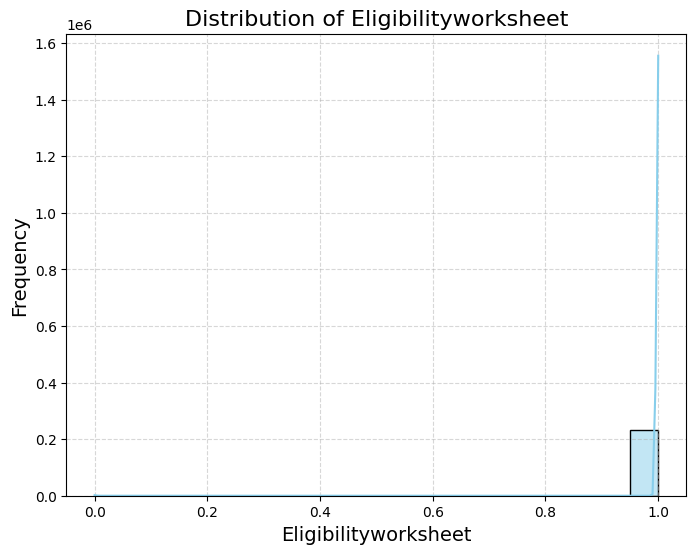

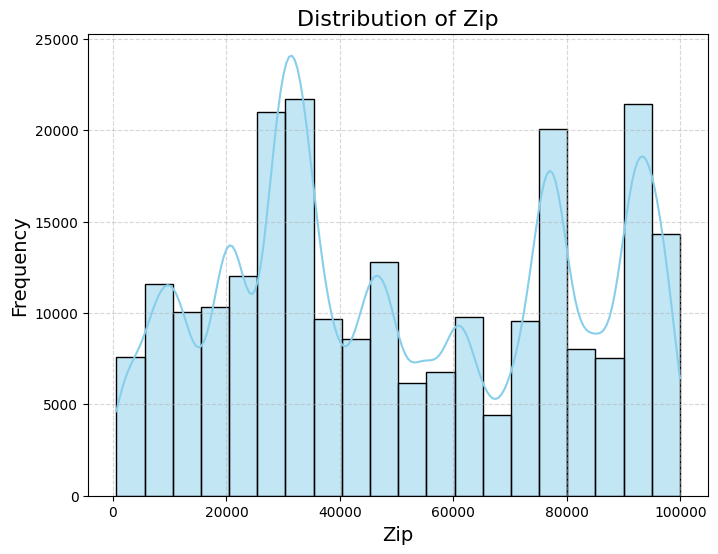

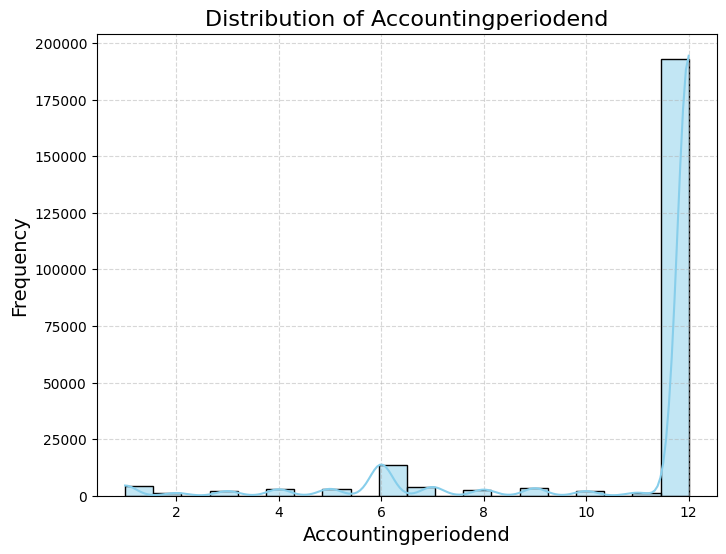

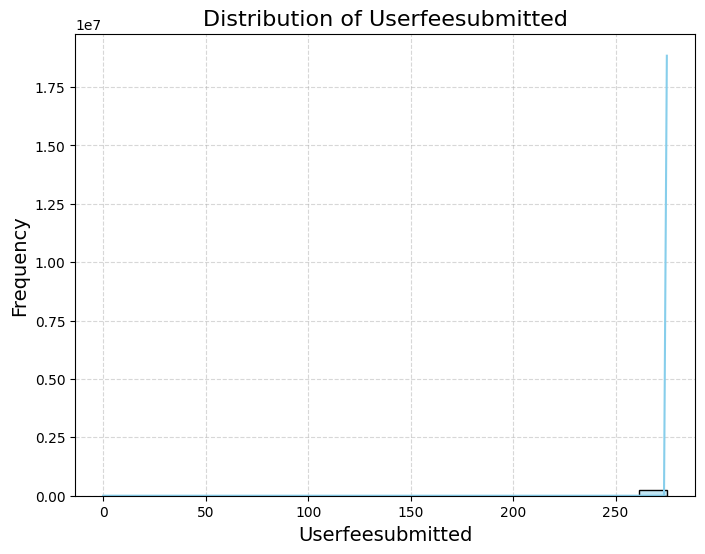

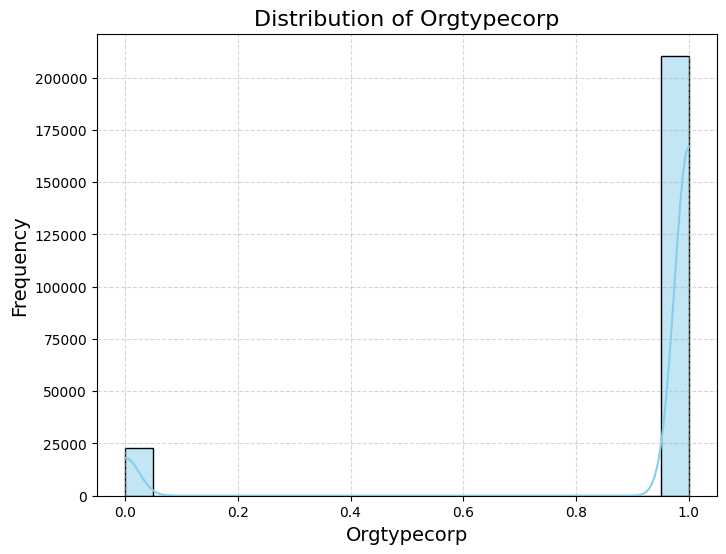

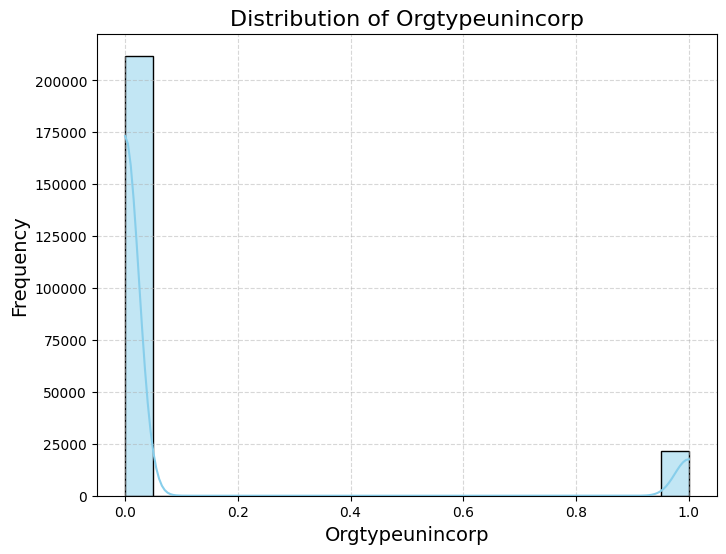

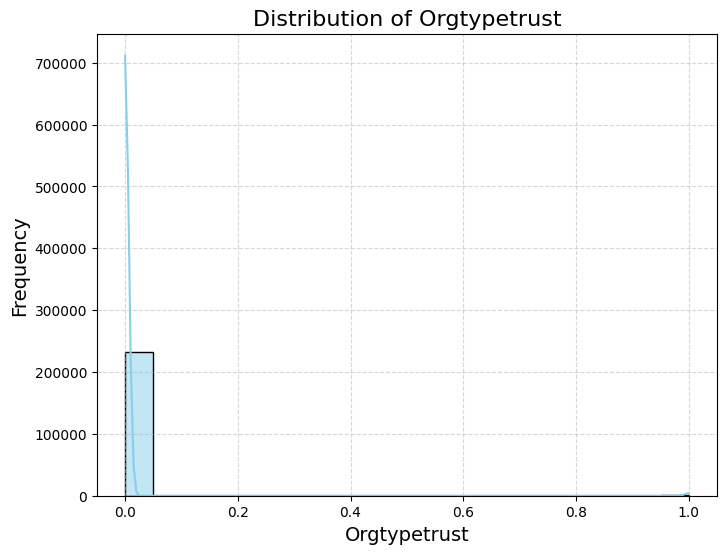

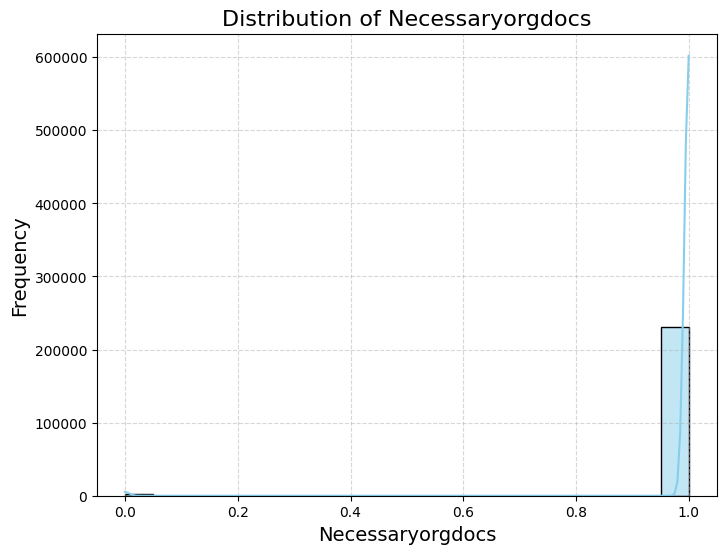

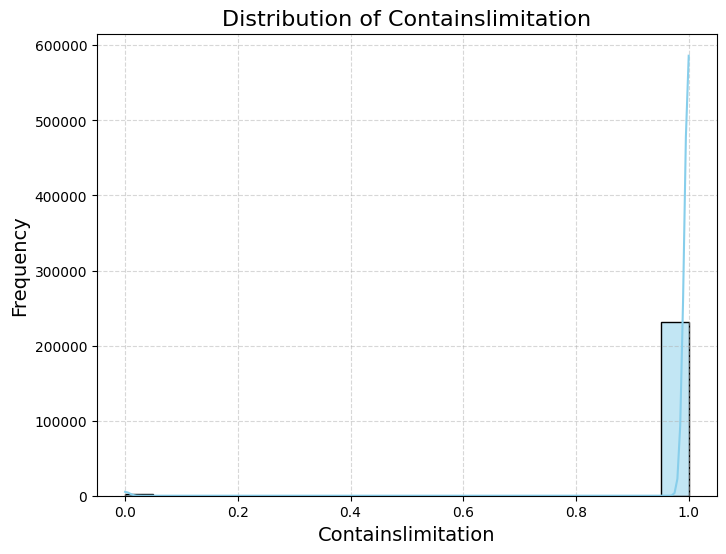

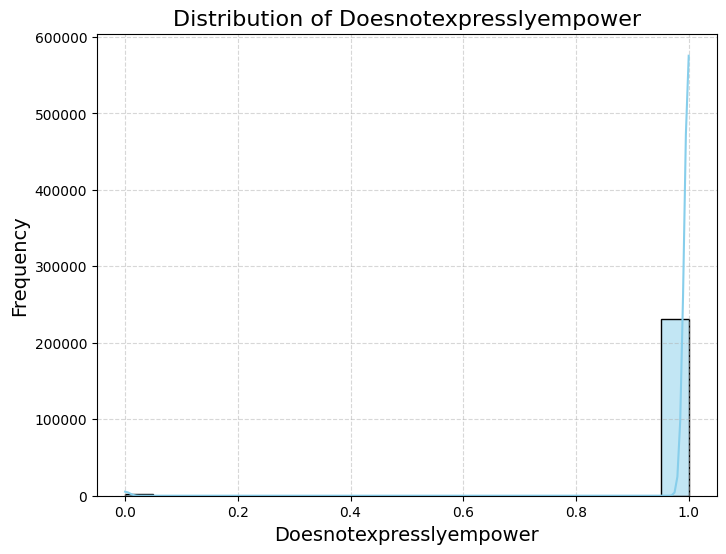

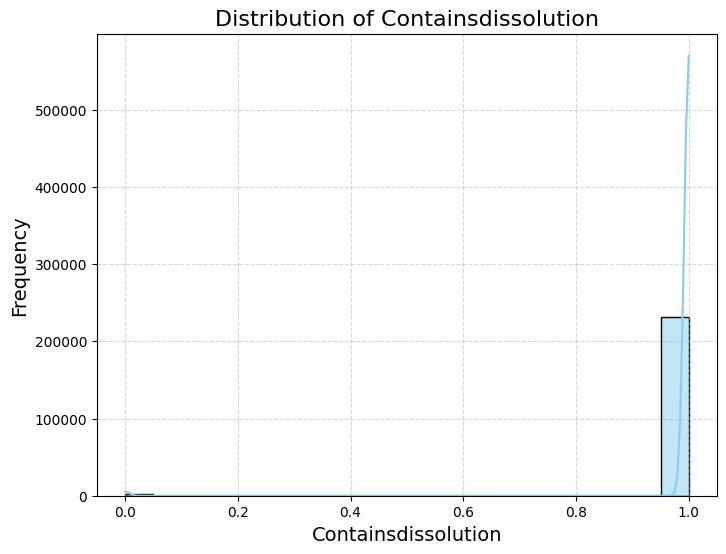

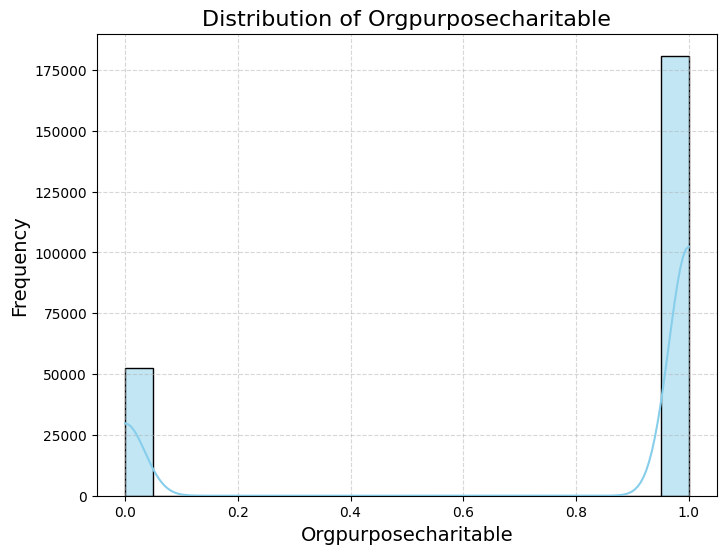

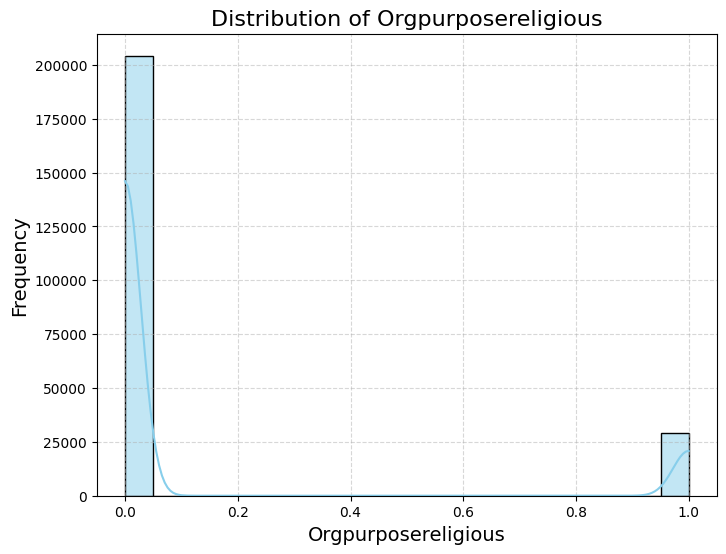

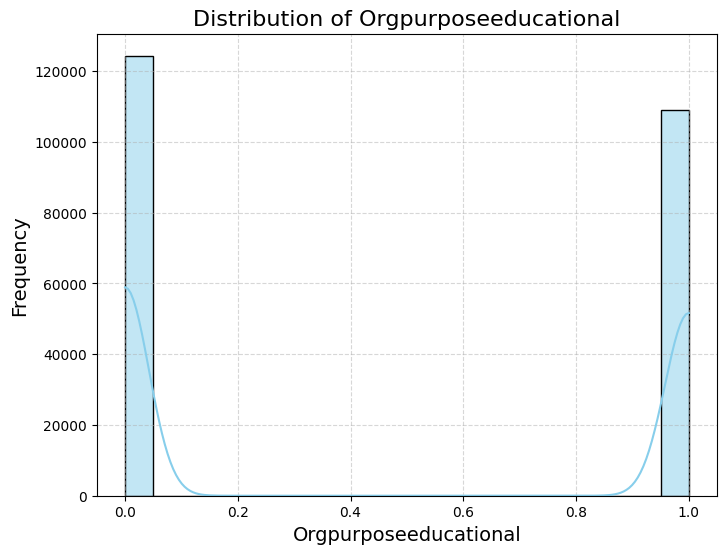

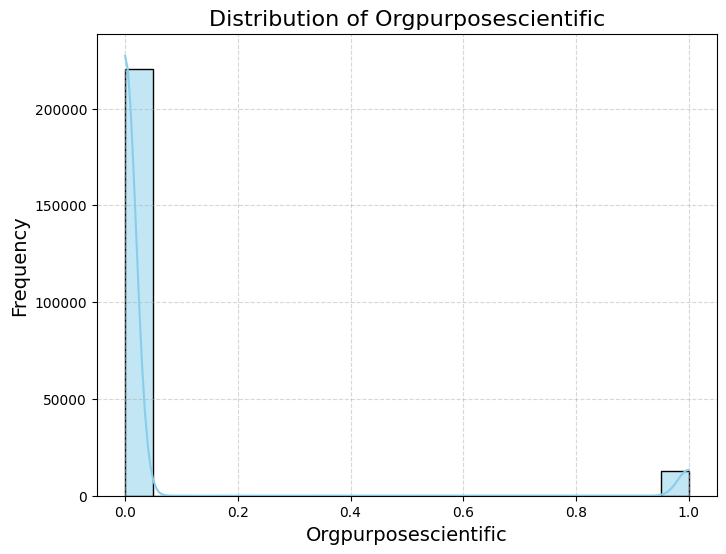

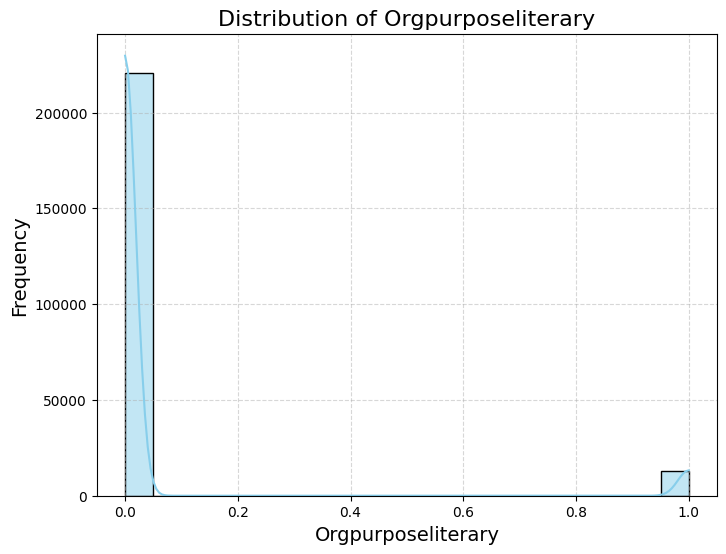

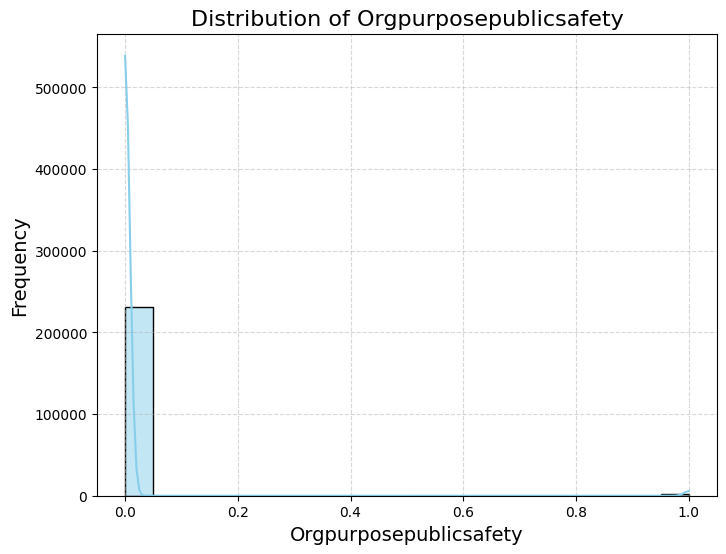

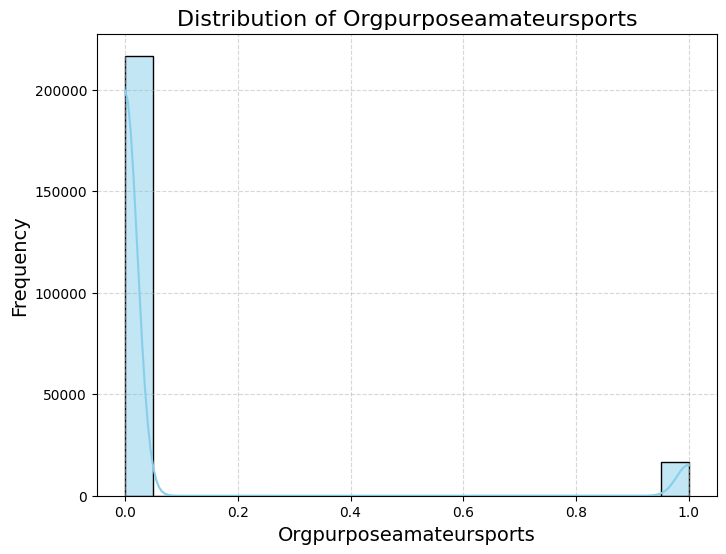

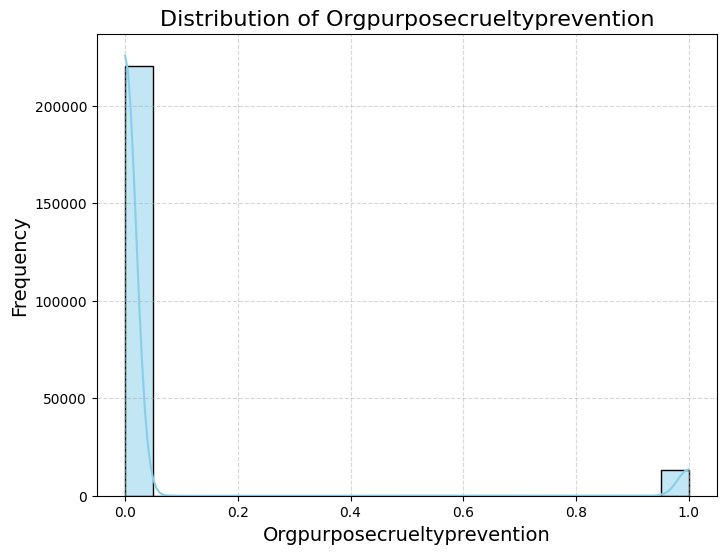

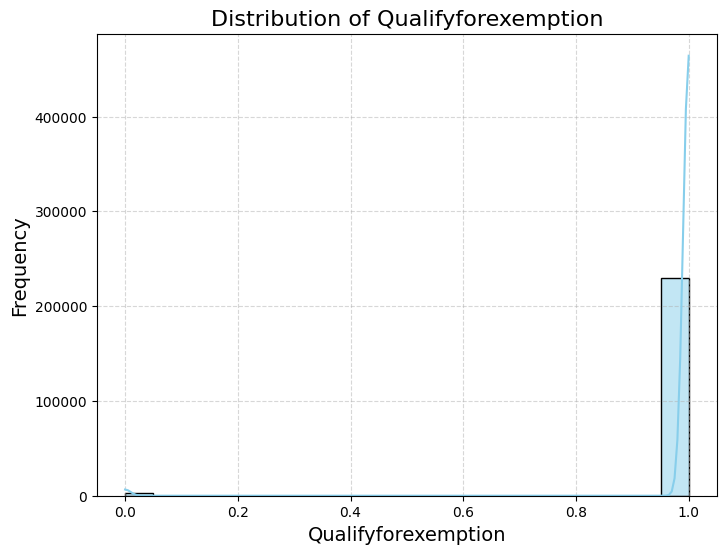

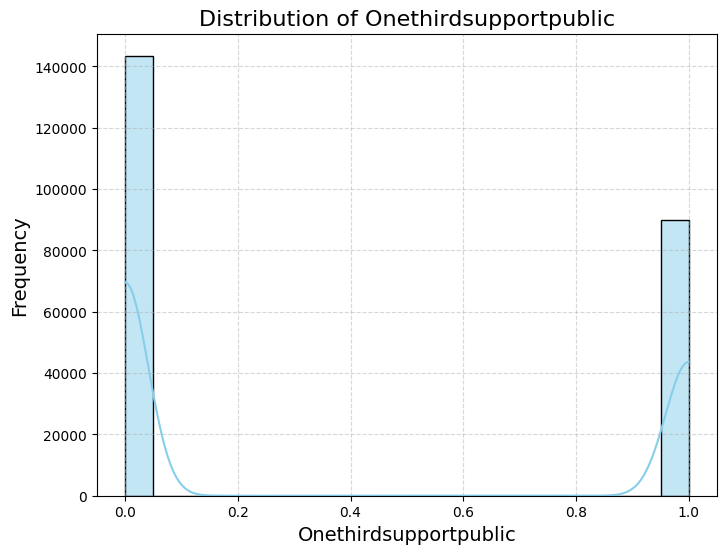

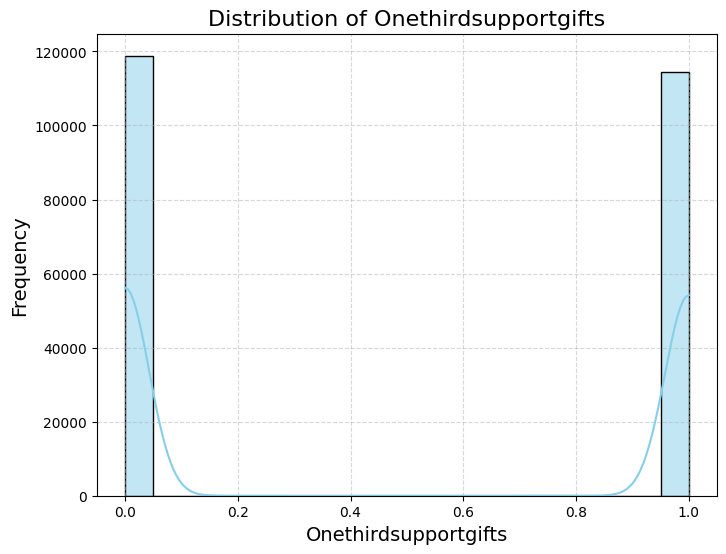

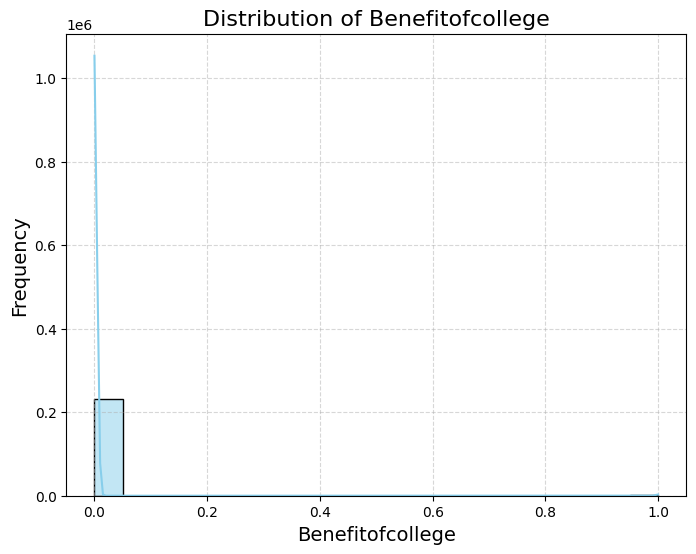

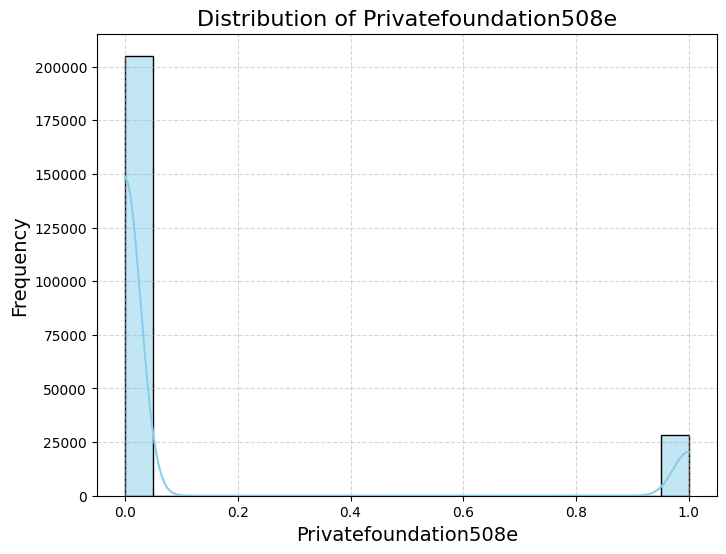

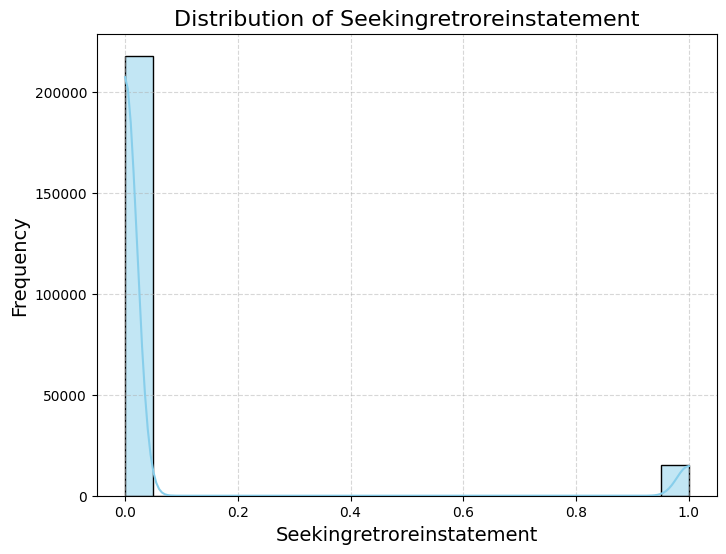

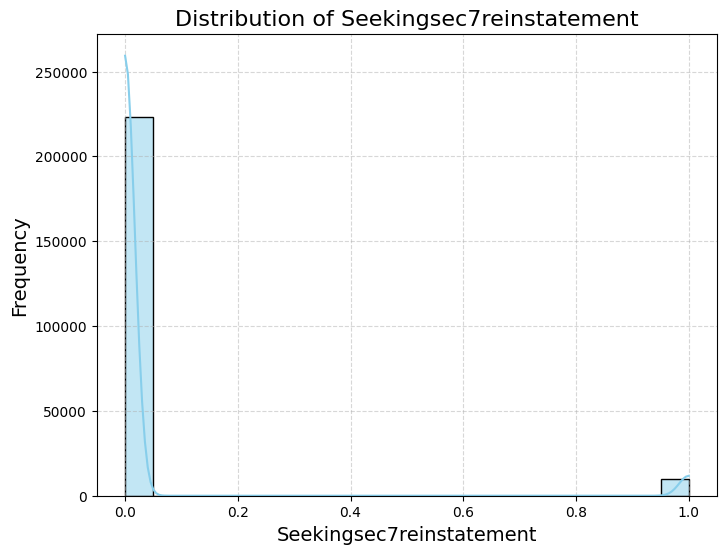

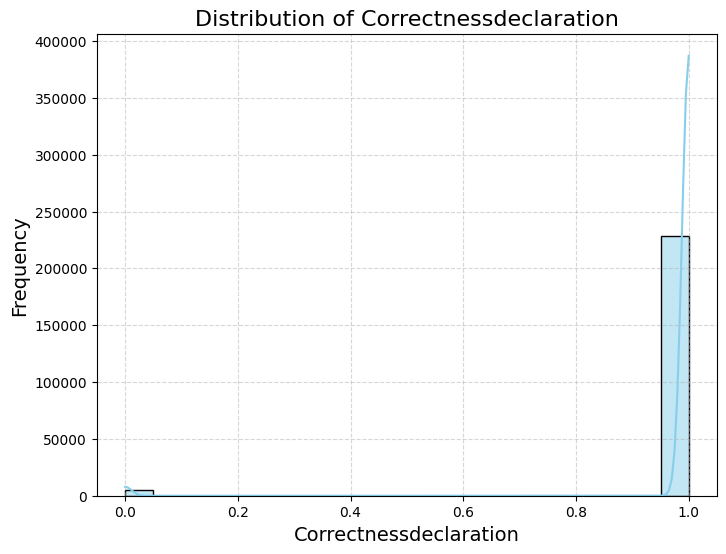

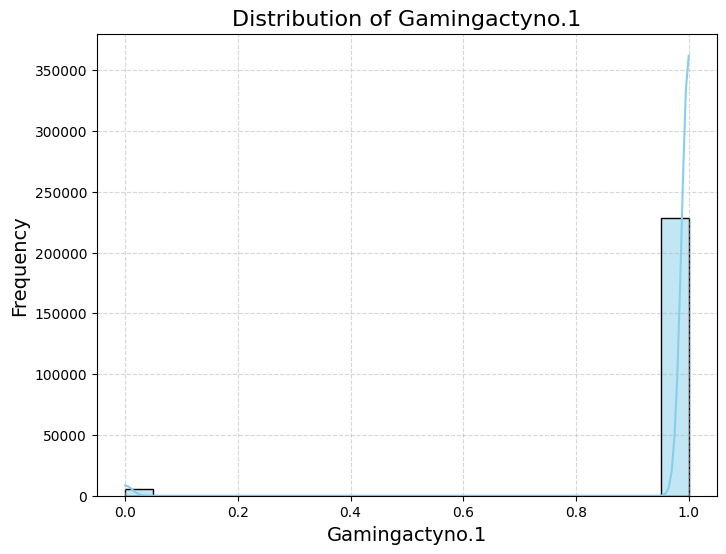

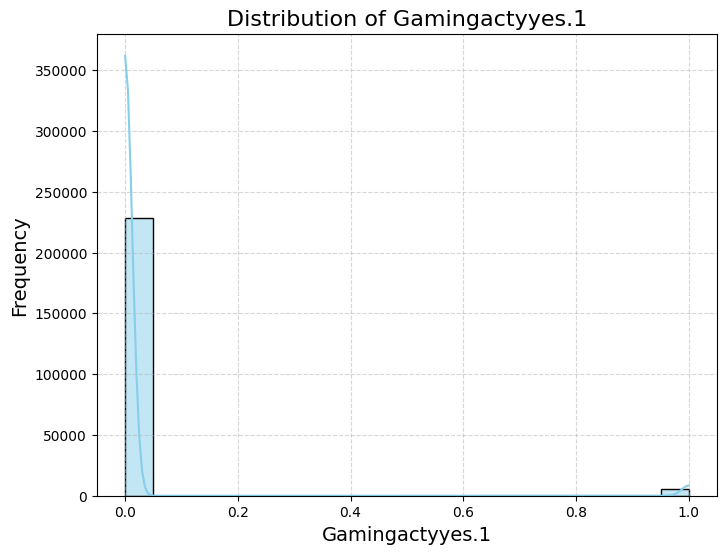

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = combined_df[non_binary_columns].select_dtypes(include=['int64', 'float64']).columns

# Plot distribution for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(combined_df[col], bins=20, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [ ]:
# Select categorical columns
categorical_columns = combined_df[non_binary_columns].select_dtypes(include='object').columns

# Plot count for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=combined_df, y=col, order=combined_df[col].value_counts().index, palette="viridis")
    plt.title(f"Count of {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

<ipython-input-11-c8a18b6c670f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, y=col, order=combined_df[col].value_counts().index, palette="viridis")


In [ ]:
# Plot a heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = combined_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Columns", fontsize=16)
plt.show()